# Homework 4 (Due 5/10)

## Name:

## ID:

## Instructions
Run everything (select cell in the menu, and click Run all), export as pdf, and submit the pdf to gradescope. 

To export as pdf, you can use the following methods: (1) File -> download as -> pdf (2) print as pdf from browser.

**Q1** Linear regression on exponential growth

Suppose we want to measure the growth of a population of bacteria. We culture the bacteria in a test tube.
We measure the volume of the cell culture at various times (hr) and obtain the following dataframe:


In [1]:
import pandas as pd
df_bac = pd.DataFrame({'time': [0, 1.5, 5, 9, 10], 'Volume':[0.37, 1.63, 2.4, 6.2, 10.66]})
print(df_bac)

   time  Volume
0   0.0    0.37
1   1.5    1.63
2   5.0    2.40
3   9.0    6.20
4  10.0   10.66


(1) Use linear regression to fit the data. Compute the $R^2$. Plot the data and the fitted line on the same figure. 

R2 0.8523390725174672


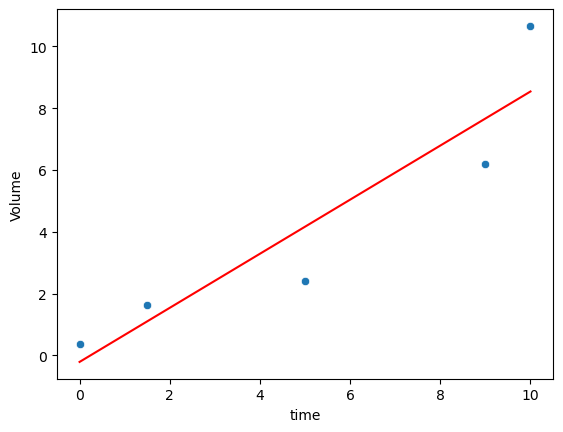

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

sns.scatterplot(data=df_bac, x='time', y='Volume')

lm = LinearRegression()
lm.fit(df_bac[['time']], df_bac['Volume'])

sns.lineplot(x=df_bac['time'], y=lm.predict(df_bac[['time']]), color='red')

score = lm.score(df_bac[['time']], df_bac['Volume'])
print(f'R2' , score)


(2) We know that when nutrients are abundant, the bacteria grow exponentially. Therefore, a better model might be

$$ y = a e^{bx} $$

where $y$ is the volume of the bacteria culture and $x$ is the time. 

Can we turn this into a linear regression problem?

Hint: Take the natural logarithm of both sides of the equation.

After taking the natural logarithm, we have

$$ \log y = \log a + bx $$

This is a linear regression problem.

(3) After the transformation, find the optimal values of $a$ and $b$.  Compute the $R^2$. Is it better than the linear model?

In [3]:
# exponential growth
lm2 = LinearRegression()
lm2.fit(df_bac[['time']], np.log(df_bac['Volume']))
a = np.exp(lm2.intercept_)
b = lm2.coef_[0]

print(a, b)

0.5954551711492091 0.2805094137824158


In [4]:
# compute R2
y_pred = a * np.exp(b * df_bac['time'])
mse = np.mean((df_bac['Volume'] - y_pred) ** 2)
var = np.var(df_bac['Volume'])
r2 = 1 - mse / var
print('R2 = ', r2)
# the R2 is higher than the linear model

R2 =  0.9605944747794366


(4) Plot the data and the fitted curve in the same figure.

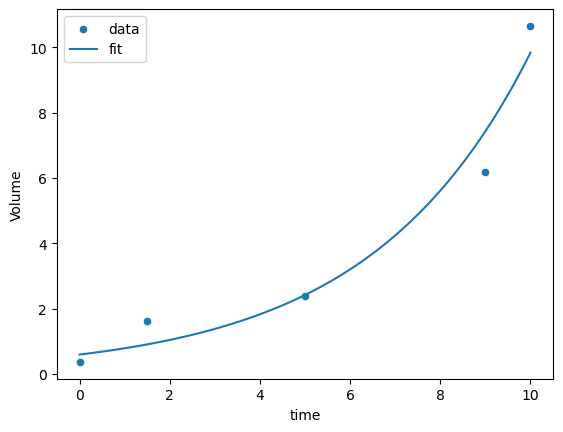

In [5]:
sns.scatterplot(data=df_bac, x='time', y='Volume')
xx = np.linspace(0, 10, 100)
yy = a * np.exp(b * xx)
sns.lineplot(x=xx, y=yy)
# add legend
_ = plt.legend(labels=["data","fit"])


**Q2** Multiple linear regression

In this problem, we would like to predict the `body_mass_g` of a penguin based on the other features in the dataset.

In [6]:
# Do not modify this cell
df = sns.load_dataset("penguins")
df.dropna(thresh=6,inplace=True)

from sklearn.model_selection import train_test_split
# the stratify parameter makes sure that the train and test sets have the same proportion of species
df_train, df_test = train_test_split(df, test_size=0.5, random_state=0, stratify=df['species'])

**(1)** First, let's start with single variable linear regression. Among the following numerical features, 

`features = ['bill_length_mm', 'bill_depth_mm',	'flipper_length_mm']`

which one is the best predictor of `body_mass_g`?

For each feature, fit a linear regression model and compute the $R^2$ on the training and testing data.

In [7]:
# find single best feature
features = ['bill_length_mm', 'bill_depth_mm',	'flipper_length_mm']


for feature in features:
    lm = LinearRegression()
    lm.fit(df_train[[feature]], df_train['body_mass_g'])
    score_train = lm.score(df_train[[feature]], df_train['body_mass_g'])
    score_test = lm.score(df_test[[feature]], df_test['body_mass_g'])
    print(f'{feature}: {score_train} {score_test}')
    


bill_length_mm: 0.3042236028988017 0.38123528774052484
bill_depth_mm: 0.17561834963296608 0.24395255304407737
flipper_length_mm: 0.7254565080042716 0.7802937024294685


**(2)** Best subset selection

In this exercise, Let's consider what is the best subset of features to predict `body_mass_g`.

Since we have 3 features, we can fit 7 models, each with a different subset of features:

- Model 1: `bill_length_mm`
- Model 2: `bill_depth_mm`
- Model 3: `flipper_length_mm`
- Model 4: `bill_length_mm`, `bill_depth_mm`
- Model 5: `bill_length_mm`, `flipper_length_mm`
- Model 6: `bill_depth_mm`, `flipper_length_mm`
- Model 7: `bill_length_mm`, `bill_depth_mm`, `flipper_length_mm`

This can be done manually. Alternatively, look up the `combinations` function in the `itertools` module (part of the Python standard library).

For each model, fit a linear regression model and compute the $R^2$ on the training and testing data.

Is the one using all features the best model?

In [8]:
from itertools import combinations

features = ['bill_length_mm', 'bill_depth_mm',	'flipper_length_mm']

best_subset = []
best_score = 0

for L in range(1, len(features) + 1):
    for subset in combinations(features, L):
        lm = LinearRegression()
        lm.fit(df_train[list(subset)], df_train['body_mass_g'])
        test_score = lm.score(df_test[list(subset)], df_test['body_mass_g'])
        train_score = lm.score(df_train[list(subset)], df_train['body_mass_g'])

        print(f'{subset}: {train_score:.4f} {test_score:.4f}')

        if test_score > best_score:
            best_score = test_score
            best_subset = subset

print(f'best subset: {best_subset} {best_score:.4f}')

('bill_length_mm',): 0.3042 0.3812
('bill_depth_mm',): 0.1756 0.2440
('flipper_length_mm',): 0.7255 0.7803
('bill_length_mm', 'bill_depth_mm'): 0.4017 0.5091
('bill_length_mm', 'flipper_length_mm'): 0.7261 0.7815
('bill_depth_mm', 'flipper_length_mm'): 0.7298 0.7803
('bill_length_mm', 'bill_depth_mm', 'flipper_length_mm'): 0.7300 0.7807
best subset: ('bill_length_mm', 'flipper_length_mm') 0.7815


**Q3** Including categorical variables in linear regression

In this problem, we stil want to predict the `body_mass_g` of a penguin based on other features in the dataset.

Let's try to make use of the `species` feature in the penguins dataset. 

In [9]:
# Do not modify this cell
df_penguins = sns.load_dataset("penguins")
df_penguins.dropna(thresh=6,inplace=True)


**(1)** 

We can think of two different methods to encode the categorical feature:

1. Method 1: Using integer 1, 2, 3 ...

2. Method 2: Using dummy variables such as `is_category_A`, where `is_category_A` is 1 if the category is A, 0 otherwise.

In this problem, we will compare the two methods.

For our dataset, the species are `['Adelie', 'Chinstrap', 'Gentoo']`. 

Let's generate a few new features in `df_penguins`:

- `code` is 0 if the species is Adelie, 1 if the species is Chinstrap, 2 if the species is Gentoo

- `is_Adelie` is 1 if the species is Adelie, 0 otherwise

- `is_Chinstrap` is 1 if the species is Chinstrap, 0 otherwise

The `is_Adelie` and `is_Chinstrap` features are called dummy variables.



In [10]:

df_penguins['is_Adelie'] = df_penguins['species'] == 'Adelie'
df_penguins['is_Chinstrap'] = df_penguins['species'] == 'Chinstrap'

# encode species as 0 1 2
code = {'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}
df_penguins['code'] = df_penguins['species'].map(code)

After generating these new features, split the new augmented dataframe into training and testing sets use the following command

In [11]:
# Do not modify this cell
df_penguins_train, df_penguins_test = train_test_split(df_penguins, test_size=0.5, random_state=0, stratify=df_penguins['species'])

(2) Compare the performance using different combinations of features. Compute the $R^2$ on training and testing sets. Which one is the best?

- Baseline: `['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']`

- Use code: `['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'code']`

- Use dummy: `['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'is_Adelie', 'is_Chinstrap']`

In [12]:
# we define a helper function for our workflow: take some features, fit a linear regression model, and return the R2 score
def get_score(df_train, df_test, features):
    lm = LinearRegression()
    lm.fit(df_train[features], df_train['body_mass_g'])
    train_score = lm.score(df_train[features], df_train['body_mass_g'])
    test_score = lm.score(df_test[features], df_test['body_mass_g'])
    return train_score, test_score

In [13]:
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']
train_score, test_score = get_score(df_penguins_train, df_penguins_test, features)
print(f'Baseline: Train score: {train_score}, Test score: {test_score}')


features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'code']
train_score, test_score = get_score(df_penguins_train, df_penguins_test, features)
print(f'Use code: Train score: {train_score}, Test score: {test_score}')


features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'is_Adelie', 'is_Chinstrap']
train_score, test_score = get_score(df_penguins_train, df_penguins_test, features)
print(f'Use dummy: Train score: {train_score}, Test score: {test_score}')

# the dummy variables are better than the code variable
# In general, encoding categorical variables as integers 1 2 3 is not a good idea, because it implies an order between the categories that does not exist.
# However, in some case, when the categories are age groups, it can make sense to encode them as 1 2 3, as there is an order between the categories.

Baseline: Train score: 0.729953765423641, Test score: 0.7807385342305077
Use code: Train score: 0.7329547327647618, Test score: 0.7813024441159253
Use dummy: Train score: 0.8224404173083516, Test score: 0.8565460654138681


(3) A final method is to fit a linear regression model for each species separately. 

For fair comparison, we need to use the same training and testing sets `df_penguins_train, df_penguins_test` as in the previous question.

More specifically, for each species $s\in$ {Adelie, Chinstrap, Gentoo}, we fit a linear regression model using `df_penguins_train[df_penguins_train['species'] == s]` and test on `df_penguins_test[df_penguins_test['species'] == s]`.



Notice that in this case, our model actually have 12 parameters. The predicted body mass of penguin $i$ is

body_mass[i]= $\beta^s_0$ + $\beta^s_1$ bill_length[i] + $\beta^s_2$ bill_depth[i] + $\beta^s_3$ flipper_length[i] if species[i] = s

where $s\in$ {Adelie, Chinstrap, Gentoo}.


Compute the $R^2$ on training and testing sets. Is this method better?

In [14]:
# fit a linear regression to each species
features = ['bill_length_mm', 'bill_depth_mm',	'flipper_length_mm']

species = df_penguins['species'].unique()

total_rss = 0

for s in species:
    df_train_species = df_penguins_train[df_penguins_train['species'] == s]
    df_test_species = df_penguins_test[df_penguins_test['species'] == s]

    lm = LinearRegression()
    lm.fit(df_train_species[features], df_train_species['body_mass_g'])


    err = np.sum((df_test_species['body_mass_g'] - lm.predict(df_test_species[features])) ** 2)
    total_rss += err

total_mse = total_rss / len(df_penguins_test)
total_r2 = 1 - total_mse / np.var(df_penguins_test['body_mass_g'])

print('Total R2:', total_r2)

# This is slightly better than the dummy variable approach

Total R2: 0.8576000807265031
